# AIDataTang-200zh - 数据分析报告

In [ ]:
!pip install pypinyin

In [66]:
import os
import re
import glob
import librosa
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import IPython.display as ipd
from tqdm import tqdm
from pypinyin import lazy_pinyin, Style

## 挂载 Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 解压数据

数据来自：[AIDataTang-200zh - 数据下载](https://github.com/wu-jingtao/training-data/blob/master/speech_recognition/chinese/AIDataTang-200zh/notebooks/AIDataTang-200zh-下载数据.ipynb)

In [4]:
!tar zxvf /content/drive/Shareddrives/TeamDrive_top_edu/原始数据/AIDataTang-200zh/aidatatang_200zh.tgz > unzip_log.txt

In [5]:
for file in tqdm(glob.glob('/content/aidatatang_200zh/corpus/**/*.tar.gz', recursive=True)):
  path = os.path.splitext(os.path.splitext(file)[0])[0]
  !mkdir {path}
  !tar -zxvf {file} -C {path} >> unzip_single_log.txt

100%|██████████| 600/600 [09:20<00:00,  1.07it/s]


## 工具方法

查看音频

In [27]:
# 这个要在执行完 `统计音频时长` 和 `统计句子长度` 之后才能运行
def show_audio(name):
  path = file_list[name]
  audio, sr = librosa.load(path, sr=None)
  text = sentences[name]
  print(''.join(text))
  ipd.display(ipd.Audio(audio, rate=sr))

## 统计音频时长

In [6]:
# 音频文件列表
file_list = dict()

for file in glob.glob('/content/aidatatang_200zh/corpus/**/*.wav', recursive=True):
  name = os.path.splitext(os.path.split(file)[1])[0]
  file_list[name] = file

In [7]:
audio_duration = dict()

for name, path in tqdm(list(file_list.items())):
  audio_duration[name] = librosa.get_duration(filename=path)

audio_duration = pd.DataFrame.from_dict(audio_duration, orient='index', columns=['duration'])
audio_duration = audio_duration.sort_values('duration', ascending=False)

100%|██████████| 237265/237265 [08:18<00:00, 475.99it/s]


总时长（小时）

In [8]:
audio_duration.sum() / 3600

duration    200.375642
dtype: float64

总体特征

In [9]:
audio_duration.describe()

,duration
count,237265.000000
mean,3.040281
std,1.108034
min,0.863187
25%,2.305500
50%,2.649625
75%,3.421125
max,21.808438


时长分布

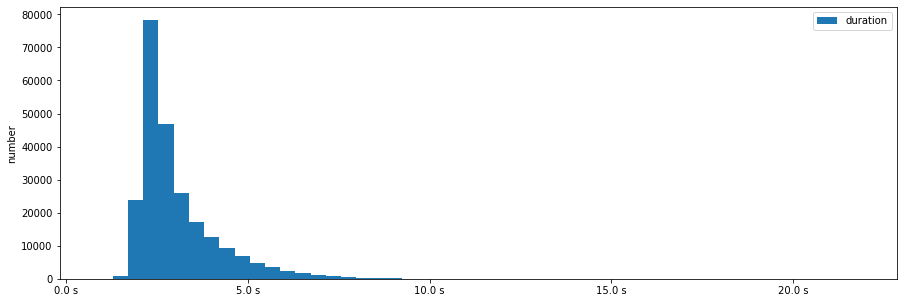

In [10]:
audio_duration.plot.hist(bins=50, figsize=(15, 5))
plt.ylabel('number')
plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f s'))

最长的 5 条音频

In [11]:
audio_duration.head()

,duration
T0055G1402S0186,21.808438
T0055G2682S0048,16.313437
T0055G1433S0091,14.312812
T0055G2291S0050,13.975375
T0055G1449S0476,13.169187


最短的 5 条音频

In [12]:
audio_duration.tail().iloc[::-1]

,duration
T0055G1887S0416,0.863187
T0055G0387S0286,1.088688
T0055G1971S0198,1.147500
T0055G1742S0351,1.160937
T0055G3021S0477,1.243812


## 统计句子长度

In [15]:
sentences = dict()

for name, path in tqdm(list(file_list.items())):
  with open(os.path.splitext(path)[0] + '.txt') as f:
    sentences[name] = next(f).strip()

100%|██████████| 237265/237265 [03:36<00:00, 1096.42it/s]


计算字数

In [16]:
sentences_length = dict()
for k, v in sentences.items():
  sentences_length[k] = len(v)

sentences_length = pd.DataFrame.from_dict(sentences_length, orient='index', columns=['length'])
sentences_length = sentences_length.sort_values('length', ascending=False)

总字数

In [17]:
sentences_length.sum()

length    2336114
dtype: int64

总体特征

In [18]:
sentences_length.describe()

,length
count,237265.000000
mean,9.846012
std,3.688600
min,1.000000
25%,8.000000
50%,8.000000
75%,10.000000
max,43.000000


长度分布

Text(0, 0.5, 'number')

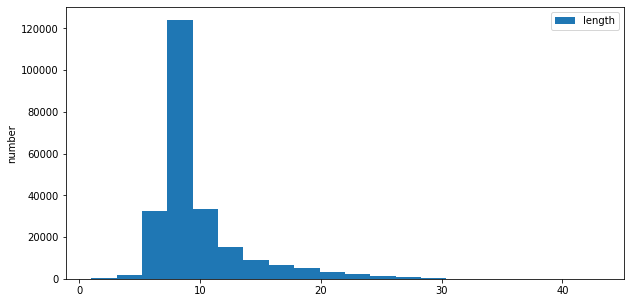

In [19]:
sentences_length.plot.hist(bins=20, figsize=(10, 5))
plt.ylabel('number')

最长的 5 条句子

In [20]:
sentences_length.head()

,length
T0055G1433S0091,43
T0055G4240S0108,43
T0055G1424S0163,42
T0055G0260S0371,39
T0055G4391S0161,38


最短的 5 条句子

In [21]:
sentences_length.tail().iloc[::-1]

,length
T0055G1424S0234,1
T0055G0150S0018,1
T0055G0251S0384,1
T0055G0243S0166,1
T0055G0726S0196,1


## 统计语速变化

In [22]:
speed_change = audio_duration['duration'] / sentences_length['length'] * 1000
speed_change = pd.DataFrame(speed_change, columns=['speed (ms)'])
speed_change = speed_change.sort_values('speed (ms)', ascending=False)

总体特征

In [23]:
speed_change.describe()

,speed (ms)
count,237265.000000
mean,318.574855
std,93.298384
min,85.830000
25%,265.593750
50%,295.289062
75%,341.745833
max,4869.125000


语速分布

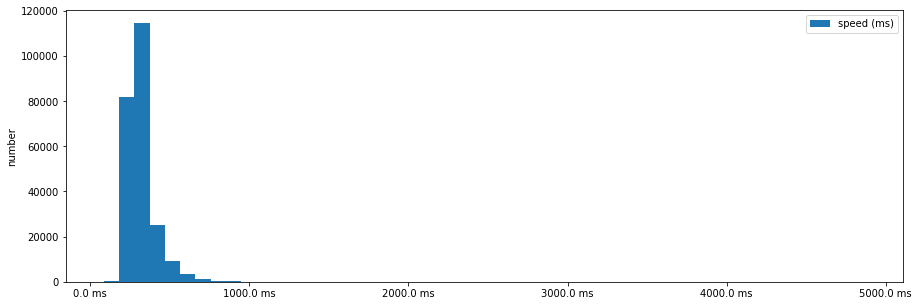

In [24]:
speed_change.plot.hist(bins=50, figsize=(15, 5))
plt.ylabel('number')
plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f ms'))

语速最快的 5 条音频

In [25]:
# 都是英文句子
speed_change.tail().iloc[::-1]

,speed (ms)
T0055G2993S0350,85.830000
T0055G1145S0357,95.425595
T0055G0298S0059,103.387500
T0055G1149S0156,106.967500
T0055G0321S0082,107.647059


语速最慢的 5 条音频

In [26]:
# 都只有一个字
speed_change.head()

,speed (ms)
T0055G0891S0115,4869.12500
T0055G0150S0018,3155.25000
T0055G0891S0082,2900.71875
T0055G0891S0114,2882.09375
T0055G0891S0180,2860.71875


## 统计发音覆盖范围

### 5 种声调的分布情况

In [75]:
pinyin_distribution = dict()
has_letter = re.compile('[a-z]', re.IGNORECASE)

for words in sentences.values():
  # 排除包含英文的语句
  if has_letter.search(words) is not None: continue

  pinyins = lazy_pinyin(words, Style.TONE3, neutral_tone_with_five=True)
  for i in pinyins:
    if i in pinyin_distribution:
      pinyin_distribution[i] +=1 
    else:
      pinyin_distribution[i] = 1

pinyin_distribution = pd.DataFrame.from_dict(pinyin_distribution, orient='index', columns=['number'])
pinyin_distribution = pinyin_distribution.sort_values('number', ascending=False)

总体特征

In [76]:
# 从结果来看，这个数据集并没有覆盖到所有的发音，一个使用4种声调的拼音表有1644种发音，而这里使用5种声调却只有1177种
pinyin_distribution.describe()

,number
count,1177.000000
mean,1921.305013
std,5542.434039
min,1.000000
25%,68.000000
50%,357.000000
75%,1601.000000
max,84362.000000


发音分布

Text(0, 0.5, 'number')

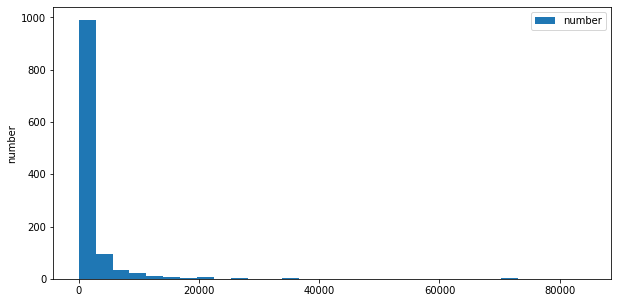

In [77]:
pinyin_distribution.plot.hist(bins=30, figsize=(10, 5))
plt.ylabel('number')

出现次数前 5 的发音

In [78]:
pinyin_distribution.head()

,number
wo3,84362
de5,70995
ni3,70318
shi4,54945
me5,46427


### 去除声调后的分布情况

In [79]:
pinyin_distribution_without_intonation = dict()

for words in sentences.values():
  # 排除包含英文的语句
  if has_letter.search(words) is not None: continue
  
  pinyins = lazy_pinyin(words)
  for i in pinyins:
    if i in pinyin_distribution_without_intonation:
      pinyin_distribution_without_intonation[i] +=1 
    else:
      pinyin_distribution_without_intonation[i] = 1

pinyin_distribution_without_intonation = pd.DataFrame.from_dict(pinyin_distribution_without_intonation, orient='index', columns=['number'])
pinyin_distribution_without_intonation = pinyin_distribution_without_intonation.sort_values('number', ascending=False)

总体特征

In [80]:
# 从结果来看，不带声调的发音覆盖的比较好，不带声调的拼音表有411种发音，这里有408种
pinyin_distribution_without_intonation.describe()

,number
count,408.000000
mean,5542.588235
std,10256.356680
min,1.000000
25%,517.250000
50%,1824.500000
75%,6115.250000
max,84672.000000


发音分布

Text(0, 0.5, 'number')

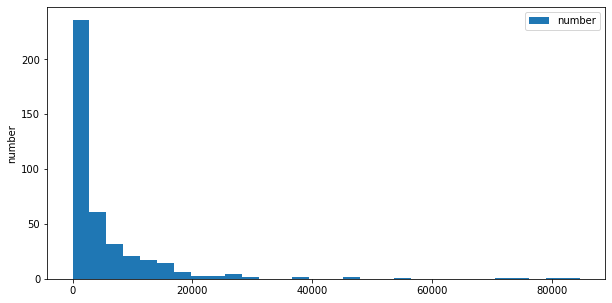

In [81]:
pinyin_distribution_without_intonation.plot.hist(bins=30, figsize=(10, 5))
plt.ylabel('number')

出现次数前 5 的发音

In [82]:
pinyin_distribution_without_intonation.head()

,number
wo,84672
shi,81516
de,73735
ni,70629
yi,54233
